In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape, cancer.feature_names

((569, 30),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [3]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
# 목표변수의 범주를 확인하는 것이 가장 먼저
pd.Series(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# 비율이 안맞는 경우 반드시 층화추출 진행
x_train, x_test, y_train, y_test = train_test_split(data, pd.Series(cancer.target), test_size=0.2, stratify=cancer.target)

In [6]:
y_train.value_counts(normalize=True)

1    0.626374
0    0.373626
dtype: float64

In [7]:
y_test.value_counts(normalize=True)

1    0.631579
0    0.368421
dtype: float64

### Cross-Validation Methods

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, 
                         scoring='accuracy'); scores

array([0.96703297, 0.91208791, 0.93406593, 0.91208791, 0.94505495])

In [10]:
# Change k
scores = cross_val_score(model, x_train, y_train, cv=30); scores

array([0.9375    , 0.875     , 0.9375    , 1.        , 1.        ,
       1.        , 0.86666667, 1.        , 0.86666667, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 0.93333333,
       0.93333333, 0.86666667, 0.93333333, 0.86666667, 0.93333333,
       0.93333333, 0.86666667, 0.86666667, 1.        , 0.93333333])

In [11]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.932
Std: 0.053
Min: 0.867
Max: 1.000


### LOOCV(Leave-One-Out Cross-Validation)

In [12]:
# LOOCV is very time-consuming => useful in small data

from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, x_train, y_train, cv=LeaveOneOut())
scores.mean()

0.945054945054945

### Shuffle-Split Cross-Validation

In [13]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.4, n_splits=10)
scores = cross_val_score(model, x_train, y_train, cv=sscv)
scores.mean()
scores

array([0.92105263, 0.94298246, 0.93421053, 0.90789474, 0.90350877,
       0.91666667, 0.91666667, 0.92982456, 0.89035088, 0.92105263])

### Under Sampling

In [14]:
x_train[y_train!=0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.030990,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.024430,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.000000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
319,12.430,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.016990,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.055320,0.1724,0.06081,...,15.85,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875
137,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.028750,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.11900,0.16480,0.13990,0.08476,0.2676,0.06765
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,0.1993,0.06453,...,13.32,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987


In [15]:
len(x_train[y_train==0])

170

In [16]:
x_train[y_train!=0].sample(len(x_train[y_train==0]))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.04274,0.1820,0.06850,...,12.98,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.22310,0.17910,0.11550,0.2382,0.08553
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.04846,0.2082,0.07325,...,13.78,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048
438,13.85,19.60,88.68,592.6,0.08684,0.06330,0.013420,0.02293,0.1555,0.05673,...,15.63,28.01,100.90,749.1,0.11180,0.11410,0.04753,0.05890,0.2513,0.06911
502,12.54,16.32,81.25,476.3,0.11580,0.10850,0.059280,0.03279,0.1943,0.06612,...,13.57,21.40,86.67,552.0,0.15800,0.17510,0.18890,0.08411,0.3155,0.07538
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,...,13.63,16.15,86.70,570.7,0.11620,0.05445,0.02758,0.03990,0.1783,0.07319


In [17]:
x_train_under = pd.concat([x_train[y_train==0],
                           x_train[y_train!=0].sample(len(x_train[y_train==0]))])

In [18]:
x_train_under.sample(len(x_train_under)) #1인 경우와 0인 경우가 연속적으로 이어져 있으므로, 한 번 섞어줘야 학습 효과가 좋음
# x_train_under = x_train_under.sort_index() 도 가능

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.045620,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.1785,0.47060,0.44250,0.14590,0.3215,0.12050
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.1246,0.21010,0.28660,0.11200,0.2282,0.06954
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.028770,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.1218,0.15500,0.12200,0.07971,0.2525,0.06827
214,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.064620,0.2235,0.06433,...,16.86,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.17720,0.4724,0.10260
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.087830,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.1525,0.66430,0.55390,0.27010,0.4264,0.12750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.057360,0.1467,0.05407,...,20.38,35.46,132.80,1284.0,0.1436,0.41220,0.50360,0.17390,0.2500,0.07944
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.068610,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.53430,0.62820,0.19770,0.3407,0.12430
159,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,12.36,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685


In [19]:
y_train_under = y_train[x_train_under.index] #x_train_under의 y 값 찾기 후 지정

### Over Sampling

In [20]:
#!pip install -U imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [22]:
x_train_over.shape

(570, 30)

In [23]:
y_train_over.value_counts()

1    285
0    285
dtype: int64

In [24]:
#GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_param = {'criterion':['gini','entropy'],
            'max_depth':np.arange(1,31)}

dt01 = DecisionTreeClassifier()
dt02 = DecisionTreeClassifier()
dt03 = DecisionTreeClassifier()
dt01_best = GridSearchCV(dt01, dt_param, scoring = 'roc_auc', n_jobs=-1, cv=4)
dt02_best = GridSearchCV(dt02, dt_param, scoring = 'roc_auc', n_jobs=-1, cv=4)
dt03_best = GridSearchCV(dt03, dt_param, scoring = 'roc_auc', n_jobs=-1, cv=4)

dt01_best.fit(x_train, y_train)
dt02_best.fit(x_train_under, y_train_under)
dt03_best.fit(x_train_over, y_train_over)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='roc_auc')

In [25]:
dt01_best.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [26]:
dt02_best.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [27]:
dt03_best.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [28]:
dt01_best.best_estimator_ #가장 최적일 때 모델 학습 결과
dt01_best = dt01_best.best_estimator_ #이렇게 진행하면 그리드 서치한 결과가 없어지지만, 메모리 사용량을 줄일 수 있음
dt02_best = dt02_best.best_estimator_
dt03_best = dt03_best.best_estimator_

In [29]:
#여러 모델을 비교할 땐, 순환문 활용이 좋음
from sklearn.metrics import roc_auc_score
models = [dt01_best, dt02_best, dt03_best]
model_names = ['RAW','UNDER','OVER']

for model, name in zip(models, model_names):
    pred = model.predict_proba(x_test)[:,1] #1일 확률
    print('{0}정확도:{1:.4f}'.format(name, roc_auc_score(y_test, pred)))

RAW정확도:0.9537
UNDER정확도:0.9580
OVER정확도:0.9769


### Scaling

In [ ]:
churn = pd.read_csv('./data/churn.csv')
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
np.random.seed(2022)
target = churn.Exited
churn = churn.drop(columns='Exited')
x_train, x_test, y_train, y_test = train_test_split(churn, target, test_size=0.3,
                                                   stratify=target)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr = LogisticRegression()

pipe = make_pipeline(StandardScaler(),LogisticRegression())
print(pipe.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())]


In [ ]:
pipe.fit(x_train, y_train)
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_auc_score
models = [lr, pipe]
model_names = ['lr_raw','pipe_simple']
for model,name in zip(models,model_names):
    pred = model.predict_proba(x_test)[:,1]
    print('{0}AUC:{1:.4f}'.format(name,roc_auc_score(y_test, pred)))

lr_rawAUC:0.6728
pipe_simpleAUC:0.7544


In [ ]:
# Grid Search Example
pipe_grid = make_pipeline(StandardScaler(), LogisticRegression())
print(pipe_grid.steps)

[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())]


In [ ]:
#기존 그리드 서치 : lr_param = {'C':[0.001,0.01, 0.1, 1, 10, 100]}
lr_param = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100],
           'logisticregression__max_iter':[100,200,300]} # 조절하고 싶은 파라미터 추가 방법

grid = GridSearchCV(pipe_grid, lr_param, cv=5, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train) # pipe 가 아닌 grid 를 fit 시킴

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__max_iter': [100, 200, 300]},
             verbose=1)

In [ ]:
lr_grid = grid.best_estimator_

In [ ]:
models = [lr, pipe, lr_grid]
model_names = ['lr_raw','pipe_simple','pipe_grid']
for model,name in zip(models,model_names):
    pred = model.predict_proba(x_test)[:,1]
    print('{0}AUC:{1:.4f}'.format(name,roc_auc_score(y_test, pred)))

lr_rawAUC:0.6728
pipe_simpleAUC:0.7544
pipe_gridAUC:0.7545


### ML Pipeline

- **`PROBLEM`**: 백화점 고객이 1년 동안 상품을 구매한 속성을 분석하여 `고객의 성별(0:여자, 1:남자)을 예측`하시오.
- **`INPUT`**: 학습용(`X_train.csv`, `y_train`)과 평가용(`X_test.csv`) 데이터 
- **`OUTPUT`**: 위 데이터를 이용하여 구축한 모형이 생성한 예측결과(`submission.csv`)

#### 0. Import Library

In [3]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
#from pandas_profiling import ProfileReport

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm, tqdm_notebook
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

#### 1. Read Data

In [4]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv('./data/X_train.csv', encoding='cp949')
test = pd.read_csv('./data/X_test.csv', encoding='cp949')

# 분석에 필요없는 ID 필드를 데이터에서 제거하고, 전처리 후 학습용과 제출용 데이터를 분리하기 위해 ID는 보관한다.
train_id = train['cust_id']
test_id = test['cust_id']
del train['cust_id'], test['cust_id']

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv('./data/y_train.csv', encoding='cp949').gender

# 전처리를 동일하게 적용하기 위해 두 데이터를 합한다. (잘못된 것이다!)
features = pd.concat([train, test]).reset_index(drop=True)
features

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,...,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,상반기 구매비율,구매 추세,주구매지점재방문률,내점시마다 구매액의 일관성
0,68282840,74,922741,11264000,35,19,17,0.094595,0.391892,0.378378,...,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,0.175676,0.648649,94.59,1.967010e+13
1,2136000,3,712000,2136000,2,2,1,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000,0.000000,1.000000,66.67,5.898240e+11
2,3197000,4,799250,1639000,1,2,1,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,1.000000,-1.000000,75.00,1.322500e+10
3,16077620,44,365400,4935000,24,18,16,0.590909,0.159091,0.113636,...,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,0.750000,-0.500000,97.73,2.298190e+12
4,29050000,3,9683333,24000000,2,2,85,0.333333,0.000000,0.666667,...,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,0.333333,0.333333,66.67,1.556260e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,82581500,14,5898679,23976000,8,8,40,0.071429,0.285714,0.285714,...,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,0.500000,0.000000,64.29,7.131590e+13
5978,480000,1,480000,480000,1,1,0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,1.000000,-1.000000,0.00,0.000000e+00
5979,260003790,71,3662025,25750000,38,19,18,0.154930,0.225352,0.154930,...,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,0.450704,0.098592,98.59,1.418010e+14
5980,88991520,18,4943973,18120000,9,5,60,0.277778,0.166667,0.277778,...,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,0.444444,0.111111,94.44,5.815030e+13


In [7]:
y_train

0       0
1       0
2       1
3       1
4       0
       ..
3495    1
3496    1
3497    0
3498    0
3499    0
Name: gender, Length: 3500, dtype: int64

#### 2. EDA

**TO DO**: Automating EDA tool
- `DataPrep`, `Pandas Profiling`, `SweetViz`, `AutoViz`

In [ ]:
#!pip install -U pandas-profiling

In [6]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(features, title="Pandas Profiling Report", explorative=True)
# profile

#### 3. Data Cleansing & Feature Engineering

In [8]:
# 범주형 변수와 수치형 변수를 분리

cat_features = features.select_dtypes(include=['object']).columns.to_list()
num_features = features.select_dtypes(exclude='object').columns.to_list()
#num_features = [c for c in features.columns.tolist() if c not in cat_features]  

In [9]:
# 결측값 처리: 범주형이냐 수치형이냐에 따라 다르게 처리

if len(num_features) > 0: 
    features[num_features] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(features[num_features])
if len(cat_features) > 0:  
    features[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(features[cat_features])

features

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,...,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,상반기 구매비율,구매 추세,주구매지점재방문률,내점시마다 구매액의 일관성
0,68282840.0,74.0,922741.0,11264000.0,35.0,19.0,17.0,0.094595,0.391892,0.378378,...,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,0.175676,0.648649,94.59,1.967010e+13
1,2136000.0,3.0,712000.0,2136000.0,2.0,2.0,1.0,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000,0.000000,1.000000,66.67,5.898240e+11
2,3197000.0,4.0,799250.0,1639000.0,1.0,2.0,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,1.000000,-1.000000,75.00,1.322500e+10
3,16077620.0,44.0,365400.0,4935000.0,24.0,18.0,16.0,0.590909,0.159091,0.113636,...,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,0.750000,-0.500000,97.73,2.298190e+12
4,29050000.0,3.0,9683333.0,24000000.0,2.0,2.0,85.0,0.333333,0.000000,0.666667,...,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,0.333333,0.333333,66.67,1.556260e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,82581500.0,14.0,5898679.0,23976000.0,8.0,8.0,40.0,0.071429,0.285714,0.285714,...,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,0.500000,0.000000,64.29,7.131590e+13
5978,480000.0,1.0,480000.0,480000.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,1.000000,-1.000000,0.00,0.000000e+00
5979,260003790.0,71.0,3662025.0,25750000.0,38.0,19.0,18.0,0.154930,0.225352,0.154930,...,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,0.450704,0.098592,98.59,1.418010e+14
5980,88991520.0,18.0,4943973.0,18120000.0,9.0,5.0,60.0,0.277778,0.166667,0.277778,...,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,0.444444,0.111111,94.44,5.815030e+13


In [10]:
# 이상치 처리 방법 중 가장 단순한 방법을 구현 
# 수치형 변수에 대해 이상치(outlier)를 처리

features[num_features] = features[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [11]:
# 수치형 변수를 정규분포에 가깝게 만들기 + 표준화
# min-max scaler 반영

features[num_features] = PowerTransformer(standardize=True).fit_transform(features[num_features])
features

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,...,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,상반기 구매비율,구매 추세,주구매지점재방문률,내점시마다 구매액의 일관성
0,0.500815,0.829928,-0.252553,0.129557,0.914315,0.634090,0.287488,-0.574876,0.980639,0.847424,...,0.366432,0.627820,0.339306,1.710988,0.840162,0.149880,-1.114411,1.118396,0.741832,0.434885
1,-1.122743,-1.112149,-0.448631,-0.887585,-1.153986,-0.993810,-1.210683,-1.310247,-1.213870,1.878999,...,1.545427,1.712075,-1.135598,1.813918,-1.097405,1.114508,-1.740886,1.726963,-0.392311,-0.303006
2,-0.966821,-0.963162,-0.362351,-1.021675,-1.484483,-0.993810,-1.210683,-1.310247,-1.213870,-1.240890,...,-1.132057,-0.900473,-1.135598,-0.695000,-1.097405,-1.361003,1.462551,-1.468324,-0.067672,-0.840461
3,-0.260227,0.493805,-0.912608,-0.415818,0.606138,0.593285,0.237687,1.277301,-0.048308,-0.412197,...,-0.471020,-0.900473,1.592665,-0.695000,0.995101,0.369195,0.730518,-0.729649,0.877114,-0.049717
4,0.035095,-1.112149,1.799611,0.711345,-1.153986,-0.993810,1.730289,0.592909,-1.213870,1.646385,...,-1.132057,-0.900473,1.592665,-0.695000,-1.097405,-0.160964,-0.580558,0.587226,-0.392311,1.022055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,0.611129,-0.232402,1.455805,0.710519,-0.248711,-0.020766,1.085903,-0.735616,0.581798,0.484796,...,1.337947,1.627544,-0.546035,-0.695000,0.243189,-1.361003,-0.040501,0.044447,-0.482722,0.784872
5978,-1.638093,-1.576152,-0.729648,-1.561587,-1.484483,-1.375368,-1.541375,-1.310247,-1.213870,-1.240890,...,1.545427,-0.900473,-1.135598,-0.695000,-1.097405,0.587044,1.462551,-1.468324,-2.326940,-1.807116
5979,1.333155,0.803103,0.960379,0.769898,0.982181,0.634090,0.335229,-0.204247,0.306280,-0.164068,...,0.889208,0.932046,0.494439,-0.695000,1.133706,1.041330,-0.197867,0.202718,0.914418,0.992709
5980,0.655202,-0.075760,1.267288,0.485272,-0.161135,-0.369851,1.531439,0.383025,-0.004617,0.450433,...,-1.132057,-0.900473,1.592665,-0.695000,-1.097405,-1.361003,-0.217987,0.222960,0.735406,0.726093


In [12]:
# label 인코딩, mean 인코딩 등등
# 범주형 변수에 One-Hot-Encoding 후 수치형 변수와 병합

# LR -> One-Hot-Encoding, mean
# DT/RF/GBM(XGB,LGBM, CATBoost) -> label 인코딩

if len(cat_features) > 0:
    features = pd.concat([features[num_features], pd.get_dummies(features[cat_features])], axis=1)
else:
    features = features[num_features]

features

,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,...,주구매 요일_금,주구매 요일_목,주구매 요일_수,주구매 요일_월,주구매 요일_일,주구매 요일_토,주구매 요일_화,선호방문계절_fall,선호방문계절_spring,선호방문계절_summer
0,0.500815,0.829928,-0.252553,0.129557,0.914315,0.634090,0.287488,-0.574876,0.980639,0.847424,...,0,0,0,0,0,1,0,1,0,0
1,-1.122743,-1.112149,-0.448631,-0.887585,-1.153986,-0.993810,-1.210683,-1.310247,-1.213870,1.878999,...,0,1,0,0,0,0,0,1,0,0
2,-0.966821,-0.963162,-0.362351,-1.021675,-1.484483,-0.993810,-1.210683,-1.310247,-1.213870,-1.240890,...,0,0,0,1,0,0,0,1,0,0
3,-0.260227,0.493805,-0.912608,-0.415818,0.606138,0.593285,0.237687,1.277301,-0.048308,-0.412197,...,0,0,0,0,0,0,1,0,1,0
4,0.035095,-1.112149,1.799611,0.711345,-1.153986,-0.993810,1.730289,0.592909,-1.213870,1.646385,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,0.611129,-0.232402,1.455805,0.710519,-0.248711,-0.020766,1.085903,-0.735616,0.581798,0.484796,...,0,0,0,0,0,1,0,1,0,0
5978,-1.638093,-1.576152,-0.729648,-1.561587,-1.484483,-1.375368,-1.541375,-1.310247,-1.213870,-1.240890,...,0,0,0,1,0,0,0,1,0,0
5979,1.333155,0.803103,0.960379,0.769898,0.982181,0.634090,0.335229,-0.204247,0.306280,-0.164068,...,0,0,0,0,1,0,0,1,0,0
5980,0.655202,-0.075760,1.267288,0.485272,-0.161135,-0.369851,1.531439,0.383025,-0.004617,0.450433,...,0,0,0,0,0,1,0,1,0,0


- Select Features

  0%|          | 0/95 [00:00<?, ?it/s]

(49, 0.7504512396520602)


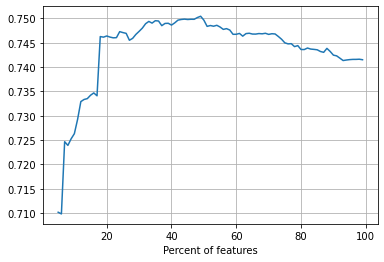

In [13]:
# 학습용과 제출용 데이터로 분리
features = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features], axis=1)
X_train = features.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test = features.query('cust_id in @test_id').drop('cust_id', axis=1)

# 사용할 모델 설정 (속도가 빠른 모델 사용 권장). 다른 모델 가능
model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm_notebook(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [14]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있음 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

print(X_train.shape)
print(features.iloc[:,1:].columns[fs.get_support()].tolist())

(3500, 156)
['총구매액', '구매건수', '평균구매액', '최대구매액', '구매상품종류1', '내점일수', '구매주기', '봄-구매비율', '여름-구매비율', '가을-구매비율', '겨울-구매비율', '환불금액', '환불건수', '내점당구매액', '내점당구매건수', '구매 추세 기울기', '화장품구매주기', '식료품구매액비율', '평균식료품구매액분위', '고가상품구매율', '베스트셀러구매비율', '환불비율', '스타킹구매건수', '평일방문비율', '평균대비구매비중', '남성포함상품구매건수', '여성키워드상품구매건수', '다양한 매장 방문', '가격선호도', '선호방문월', '행사상품구매수', '저가상품구매율', '요일 간 구매건수 편차', '충동지수', '남성용품구매건수', '여성용품구매건수', '하루 최고 구매 건수', '만족도 떨어지는 제품 총 구입금액', '만족도 떨어지는 제품 총 구매건수', '가성비 제품 총 구입금액', '휴면일수', '아동용품 구매건수', '명절식품비용', '단독상품군구매율', '구매액표준편차', '중복구매배수', '의류_거래율(의류+식품+생활잡화)', '패션_대비_남성상품_거래율', '패션_대비_여성상품_거래율', '전체방문_중_환불방문(표준화)', '월_재방문율', '시즌 마감 방문비율', '상반기 구매비율', '구매 추세', '주구매지점재방문률', '내점시마다 구매액의 일관성', '주구매상품_가공식품', '주구매상품_건강식품', '주구매상품_골프', '주구매상품_구두', '주구매상품_남성 캐주얼', '주구매상품_남성정장', '주구매상품_농산물', '주구매상품_디자이너', '주구매상품_생활잡화', '주구매상품_섬유잡화', '주구매상품_셔츠', '주구매상품_스포츠', '주구매상품_시티웨어', '주구매상품_식기', '주구매상품_일용잡화', '주구매상품_젓갈/반찬', '주구매상품_주류', '주구매상품_주방가전', '주구매상품_준보석/시계', '주구매상품_화장품', '주구매지점_강남점', '주구매지점_노원점', '주구매지점_대구

#### 4. Model Tuning (Hyperparameter Optimization)

In [15]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.3, random_state=2022)

In [16]:
clfs = [
    (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        MLPClassifier(random_state=2022),
        {'batch_size': ['auto', 32, 64, 128],
         'learning_rate' : ['constant', 'adaptive'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        LogisticRegression(random_state=2022),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestClassifier(random_state=2022),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingClassifier(random_state=2022),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm_notebook(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='roc_auc', 
                                     cv=3, random_state=2022, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_dev, y_dev)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

  0%|          | 0/5 [00:00<?, ?it/s]

KNeighborsClassifier                                 0.715308 8.5
MLPClassifier                                        0.761840 28.8
LogisticRegression                                   0.759772 0.3
RandomForestClassifier                               0.726524 2.3
GradientBoostingClassifier                           0.744128 16.0


#### 5. Model Ensemble

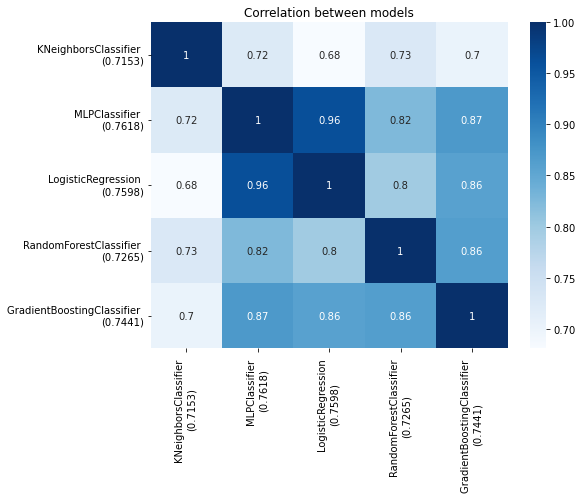

In [17]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

- Mean agreement vs. Performance

In [18]:
# Mean agreement
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

KNeighborsClassifier \n(0.7153)          0.708286
MLPClassifier \n(0.7618)                 0.844769
LogisticRegression \n(0.7598)            0.824894
RandomForestClassifier \n(0.7265)        0.803120
GradientBoostingClassifier \n(0.7441)    0.823159
dtype: float64

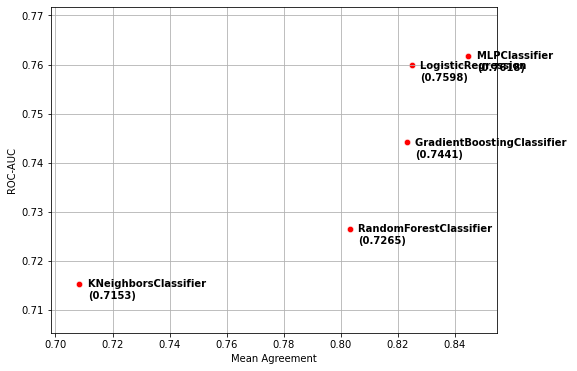

In [19]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

- Averaging Ensemble

In [20]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',    
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [21]:
max_score = 0
for p in tqdm_notebook([0, 1, 2.56]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_dev)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_dev)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_dev, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

  0%|          | 0/3 [00:00<?, ?it/s]

p=1
KNeighborsClassifier●MLPClassifier●LogisticRegression●GradientBoostingClassifier
0.7658595033336555


In [22]:
# sklearn의 다른 classifier와 호환성을 갖기위해 Custom Classifier인 "AveragingClassifier" 생성

class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in self.estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in self.estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in self.estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in self.estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf = AveragingClassifier(estimators, p)
avg_clf.fit(X_train, y_train) 

- stacking

In [23]:
# 2-layer stacking => 3-layer까지 확장할 수 있다.

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected = [
#    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',    
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=0), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_dev, stk_clf.predict_proba(X_dev)[:,1]))

0.7640235771572133


#### 6. Deployment

In [ ]:
# Averaging ensemble로 예측한 submission: 
pd.DataFrame({'cust_id': test_id, 'gender': avg_clf.predict_proba(X_test)[:,1]}).to_csv('submission_avg.csv', index=False)

# Stacking ensemble로 예측한 submission: 
pd.DataFrame({'cust_id': test_id, 'gender': stk_clf.predict_proba(X_test)[:,1]}).to_csv('submission_stk.csv', index=False)